In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [3]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [4]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [5]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [6]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [7]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [8]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [9]:
#GRADIENT DESCENT
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(X_train.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs = []
    past_costs_test= []
    past_rmse= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost[0][0])
        rmse_train = np.sqrt((2*(cost[0][0])))
        past_rmse.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs) > 1) and abs(past_costs[-2]-past_costs[-1]) <= precis):
            break
            
    return theta, past_costs, past_costs_test, past_rmse, past_rmse_test


In [10]:
np.random.seed(123)
rmse_train_grad_desc = [None]*20
rmse_test_grad_desc = [None]*20
past_costs = [None]*20
past_costs_test = [None]*20
precision = 0.000001
eta = 0.01
iterations = 2000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta, past_costs[i], past_costs_test[i], rmse_train_grad_desc[i], rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(rmse_train_grad_desc[i])): 
        if x%50==0:
            print(rmse_train_grad_desc[i][x], sep = "\n") 
    print ("\n")


Error values (every 50th iteration) for model number 1 :-

1.27073212104766
1.0809033213418793
1.0000299920494173
0.9677562547397051
0.955282520836978
0.9505245080956316
0.9487182386954625
0.9480334900020525
0.9477739325821595
0.9476755087047198


Error values (every 50th iteration) for model number 2 :-

1.576321267346977
1.2171444366945938
1.0577541754619564
0.9935046819435389
0.9689512390572822
0.9597622039698576
0.956339418273106
0.9550619253386978
0.9545829409037783
0.9544023606211408


Error values (every 50th iteration) for model number 3 :-

1.2802740767175649
1.0867963713428155
1.0083011442851877
0.9783896537672208
0.9672878706612524
0.9631979908606683
0.9616909053150449
0.9611339074248806
0.9609272790129043


Error values (every 50th iteration) for model number 4 :-

1.2687860811942655
1.0804265140781877
1.0012938882383235
0.9700682933619821
0.9580920537860634
0.9535423798168722
0.9518161339602489
0.9511597780145975
0.9509093672823573
0.9508134597477242


Error values (every 

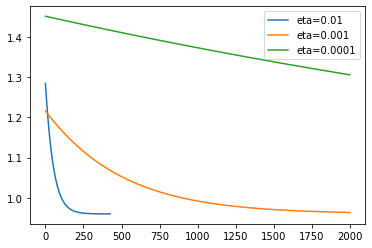

In [11]:
#now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.001
eta3=0.0001

final_theta2, past_costs2, past_costs_test2, rmse_train_grad_desc2, rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs3, past_costs_test3, rmse_train_grad_desc3, rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(rmse_train_grad_desc[19], label="eta=0.01")
plt.plot(rmse_train_grad_desc2, label="eta=0.001")
plt.plot(rmse_train_grad_desc3, label="eta=0.0001")
plt.legend()
